In [14]:
import jax
from jax import numpy as jnp
import pickle
import matplotlib.pyplot as plt
from matplotlib import ticker


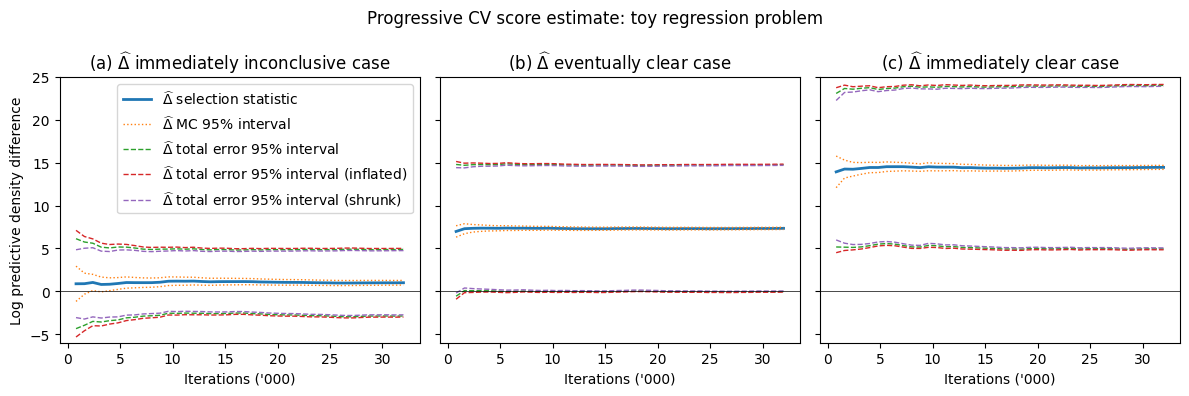

In [16]:
total_batches = 40
batch_size = 200
num_chains = 4

names = {
    'immediately inconclusive': 'reg_cmp_inconclusive.pkl',
    'eventually clear': 'reg_cmp_eventual.pkl',
    'immediately clear': 'reg_cmp_clear.pkl'
}

it = jnp.arange(1, total_batches+1) * batch_size * num_chains

zcrit = jax.scipy.stats.norm.ppf(0.975)

fig, axes = plt.subplots(1, len(names), figsize=(12, 4), sharey=True)
for i, (ax, name, fname) in enumerate(zip(axes, names.keys(), names.values())):
    with open(fname, 'rb') as f:
        res = pickle.load(f)
    
    _m = ax.plot(it, res['delta'], linewidth=2)
    _c = ax.plot(it, res['delta'] + zcrit*res['differr'], linewidth=1, linestyle=':')
    ax.plot(it, res['delta'] - zcrit*res['differr'], linewidth=1, linestyle=':', color=_c[0].get_color())

    _cv = ax.plot(it, res['diff_uq'], linewidth=1, linestyle='--')
    ax.plot(it, res['diff_lq'], linewidth=1, linestyle='--', color=_cv[0].get_color())

    _cvw = ax.plot(it, res['diff_uq_wide'], linewidth=1, linestyle='--')
    ax.plot(it, res['diff_lq_wide'], linewidth=1, linestyle='--', color=_cvw[0].get_color())

    _cvn = ax.plot(it, res['diff_uq_narrow'], linewidth=1, linestyle='--')
    ax.plot(it, res['diff_lq_narrow'], linewidth=1, linestyle='--', color=_cvn[0].get_color())

    ax.set_title(f'({chr(ord("a")+i)}) $\\widehat\\Delta$ {name} case')
    if i == 0:
        ax.legend(
            [_m[0], _c[0], _cv[0], _cvw[0], _cvn[0]],
            [r'$\widehat{\Delta}$ selection statistic', r'$\widehat{\Delta}$ MC 95% interval', r'$\widehat{\Delta}$ total error 95% interval',
            r'$\widehat{\Delta}$ total error 95% interval (inflated)', r'$\widehat{\Delta}$ total error 95% interval (shrunk)'],
            loc='best')
    ax.axhline(0, linewidth=0.5, color='k')

axes[0].set_ylabel("Log predictive density difference")
axes[0].set_ylim(-6., 25.)

fmt = ticker.FuncFormatter(lambda x, pos: f'{x/1e3:.0f}')
for ax in axes:
    ax.set_xlabel("Iterations ('000)")
    ax.xaxis.set_major_formatter(fmt)

fig.suptitle(f'Progressive CV score estimate: toy regression problem')
fig.tight_layout()
fig.savefig('stop_rule.pdf', bbox_inches=0, transparent=True)